# Tutorial of PL2VEC

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random
import sys
%matplotlib inline
os.chdir('..')
os.getcwd()

'/home/demir/Desktop/physical_embedding'

In [2]:
from helper_classes import PL2VEC
from helper_classes import Parser
from helper_classes import DataAnalyser
import util as ut

### The input RDF graph

Father is a folder containing .nt formatted RDF graph.

In [3]:
# Define paths
kg_root = 'tutorials/knowledge graphs'
kg_path = kg_root + '/Father' # or Father/father.nt
dl_learner_path = '/home/demir/Desktop/physical_embedding/dllearner-1.3.0/bin/cli'

In [4]:
#cat tutorials/knowledge\ graphs/Father/father.nt

In [5]:
# DEFINE MODEL PARAMS
K = 3
num_of_dims = 2
bound_on_iter = 15
negative_constant = -1
e_release = 0.1
num_sample_from_clusters = 2
system_energy=10

random_state = 1
np.random.seed(random_state)
random.seed(random_state)

In [6]:
storage_path,experiment_folder= ut.create_experiment_folder()

In [7]:
parser = Parser(p_folder=storage_path)

model = PL2VEC(system_energy=system_energy)

analyser = DataAnalyser(p_folder=storage_path, execute_DL_Learner=dl_learner_path)

In [8]:
stats_corpus_info = parser.construct_comatrix(kg_path, bound=500, bound_flag=True)
vocab_size = len(stats_corpus_info)


###### KG to PPMI Matrix  starts ######
KG to PPMI Matrix  took  0.003312826156616211  seconds



In [9]:
sys.getsizeof(stats_corpus_info)#returns bytes

368

In [10]:
P, N = parser.get_attactive_repulsive_entities(stats_corpus_info, K)

In [11]:
# due to memory usage
del stats_corpus_info

In [12]:
ut.serializer(object_=N, path=parser.p_folder, serialized_name='Negative_URIs')
ut.serializer(object_=P, path=parser.p_folder, serialized_name='Positive_URIs')

In [13]:
sys.getsizeof(P)+sys.getsizeof(N)

392

In [14]:
holder = model.combine_information(P, N)
del P
del N

In [15]:
sys.getsizeof(holder)

192

In [16]:
embeddings = model.randomly_initialize_embedding_space(vocab_size, num_of_dims)
# embeddings = model.initialize_with_svd(stats_corpus_info, num_of_dims)

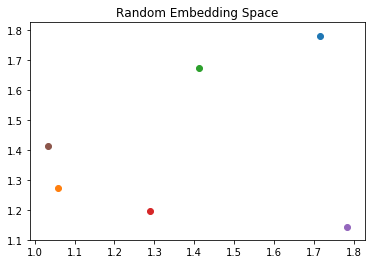

In [17]:
ut.visualize_2D(low_embeddings=embeddings,storage_path=storage_path,title='Random Embedding Space')

In [18]:
learned_embeddings = model.start(e=embeddings,
                                 max_iteration=bound_on_iter, energy_release_at_epoch=e_release,
                                 holder=holder, negative_constant=negative_constant)
del embeddings
del holder


###### Generating Embeddings:  starts ######
EPOCH:  0
EPOCH:  1

 Epoch:  1
Previous norm 4.47213595499958
New norm 4.47213595499958
The differences in matrix norm  0.0
d(Semantically Similar)/d(Not Semantically Similar)  0.7670393755837919
The state of equilibrium is reached.
Generating Embeddings:  took  0.017252206802368164  seconds



In [20]:
representative_entities = analyser.pipeline_of_data_processing_single_run(learned_embeddings, num_sample_from_clusters)


###### Pipeline of DP  starts ######

###### Prune non resources  starts ######
Prune non resources  took  0.0014507770538330078  seconds


###### Pseudo labeling via DBSCAN  starts ######
Pseudo labeling via DBSCAN  took  0.010645866394042969  seconds


###### Sample from mean of clusters  starts ######
Sample from mean of clusters  took  0.017246246337890625  seconds

Pipeline of DP  took  0.0408778190612793  seconds



In [21]:
analyser.pipeline_of_single_evaluation_dl_learner(representative_entities)


###### DL-Learner  starts ######
Total Num of clusters  [-1]
DL-Learner  took  0.0053708553314208984  seconds



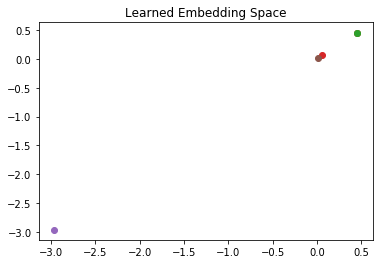

In [22]:
ut.visualize_2D(low_embeddings=learned_embeddings,storage_path=storage_path,title='Learned Embedding Space')

In [23]:
representative_entities

{-1: ['http://example.com/father#markus', 'http://example.com/father#anna']}

In [24]:
# run DL learner
analyser.generated_responds(experiment_folder)

[('/home/demir/Desktop/physical_embedding/Experiments/2019-02-14 16:04:50.834311', ['-1.conf'])]
/home/demir/Desktop/physical_embedding/Experiments/2019-02-14 16:04:50.834311
['-1.conf']


[['\n\n',
  '### -1.conf starts ###',
  'DL-Learner command line interface',
  "Initializing component 'ks' of type OWL File ...",
  "... initialized component 'ks' in 0ms. Status: OK",
  "Initializing component 'reasoner' of type closed world reasoner ...",
  'OntologyID(Anonymous-2)',
  'Loaded reasoner: Pellet (com.clarkparsia.pellet.owlapiv3.PelletReasoner)',
  'Materializing TBox...',
  '...TBox materialised in 98 ms.',
  "... initialized component 'reasoner' in 838ms. Status: OK",
  "Initializing component 'op' of type rho refinement operator ...",
  "... initialized component 'op' in 3ms. Status: OK",
  "Initializing component 'fmeasure' of type FMeasure ...",
  "... initialized component 'fmeasure' in 0ms. Status: OK",
  "Initializing component 'lp' of type PosNegLPStandard ...",
  "... initialized component 'lp' in 0ms. Status: OK",
  "Initializing component 'alg' of type CELOE ...",
  "... initialized component 'alg' in 1ms. Status: OK",
  'Running algorithm instance "alg" (C